# ANALISIS EXPLORATORIO DE LOS DATOS (EDA)
## El objetivo es entender la estructura , las caracteristicas y las posibles relaciones en los datos antes de construir cualquier modelo.

Carga del DS listo para analisis

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga el archivo del archivo limpio
df = pd.read_csv('G:\\tecnicatura en cd e ia\\2025\\SEGUNDO AÑO\\2do año 1er cuatrimestre\\aprendizaje automatico\\PROYECTOS AA\\analisis_PIB_paises_del_mundo\\data\\processed\\pib_limpio.csv', skiprows=1)

### Visión general de los datos

* `df.head()`: Primeras filas, para ver las columnas, los nombres y los tipos de datos a grandes rasgos.
* `df.info()`: Revisar la información con un resumen de números de filas y columnas, los nombres de las columnas, la cantidad de valores no nulos en cada una y el tipo de dato.
* `df.describe()`: Obtener estadísticas descriptivas para las columnas numéricas. Con esto nos mostrará estadísticas como la media, desviación estándar, valores mínimos y máximos, y los cuartiles.

In [16]:
df.head()

,Country Name,Country Code,2019.0,2020.0,2021.0,2022.0,2023.0
0,Argentina,ARG,1.492100e+12,5.090000e+11,2.781000e+11,7.350000e+11,1.361300e+12
1,Brazil,BRA,8.961000e+11,2.279500e+12,1.978400e+12,1.322700e+12,1.234500e+12
2,United States,USA,2.164700e+12,6.277000e+11,6.323000e+11,1.705900e+12,1.531200e+12
3,China,CHN,8.600000e+09,1.491000e+11,1.204200e+12,2.200000e+12,9.592000e+11
4,India,IND,8.261000e+11,1.537000e+12,2.098200e+12,2.001300e+12,1.486400e+12


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  51 non-null     object 
 1   Country Code  51 non-null     object 
 2   2019.0        51 non-null     float64
 3   2020.0        51 non-null     float64
 4   2021.0        51 non-null     float64
 5   2022.0        51 non-null     float64
 6   2023.0        51 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


In [18]:
# --- Estadísticas Descriptivas ---
print("--- Estadísticas Descriptivas del PIB por año ---")
# Seleccionamos las columnas de los años para el análisis
df_pib = df[['2019.0', '2020.0', '2021.0', '2022.0', '2023.0']]
print(df_pib.describe())
print("\n")

--- Estadísticas Descriptivas del PIB por año ---
             2019.0        2020.0        2021.0        2022.0        2023.0
count  5.100000e+01  5.100000e+01  5.100000e+01  5.100000e+01  5.100000e+01
mean   2.297086e+12  2.530067e+12  2.420443e+12  2.506341e+12  2.724741e+12
std    8.074134e+12  8.891849e+12  8.499300e+12  8.794686e+12  9.552498e+12
min    8.600000e+09  1.150000e+10  2.860000e+10  4.290000e+10  2.170000e+10
25%    4.702000e+11  5.225500e+11  6.608000e+11  7.343000e+11  1.185300e+12
50%    1.230300e+12  1.399400e+12  1.356700e+12  1.330500e+12  1.479800e+12
75%    1.904900e+12  2.160050e+12  1.846400e+12  1.856800e+12  1.807000e+12
max    5.857570e+13  6.451670e+13  6.172130e+13  6.391170e+13  6.948090e+13




## VISUALIZACIONES
Gráfico de lineas para la evolución del PIB de cada país

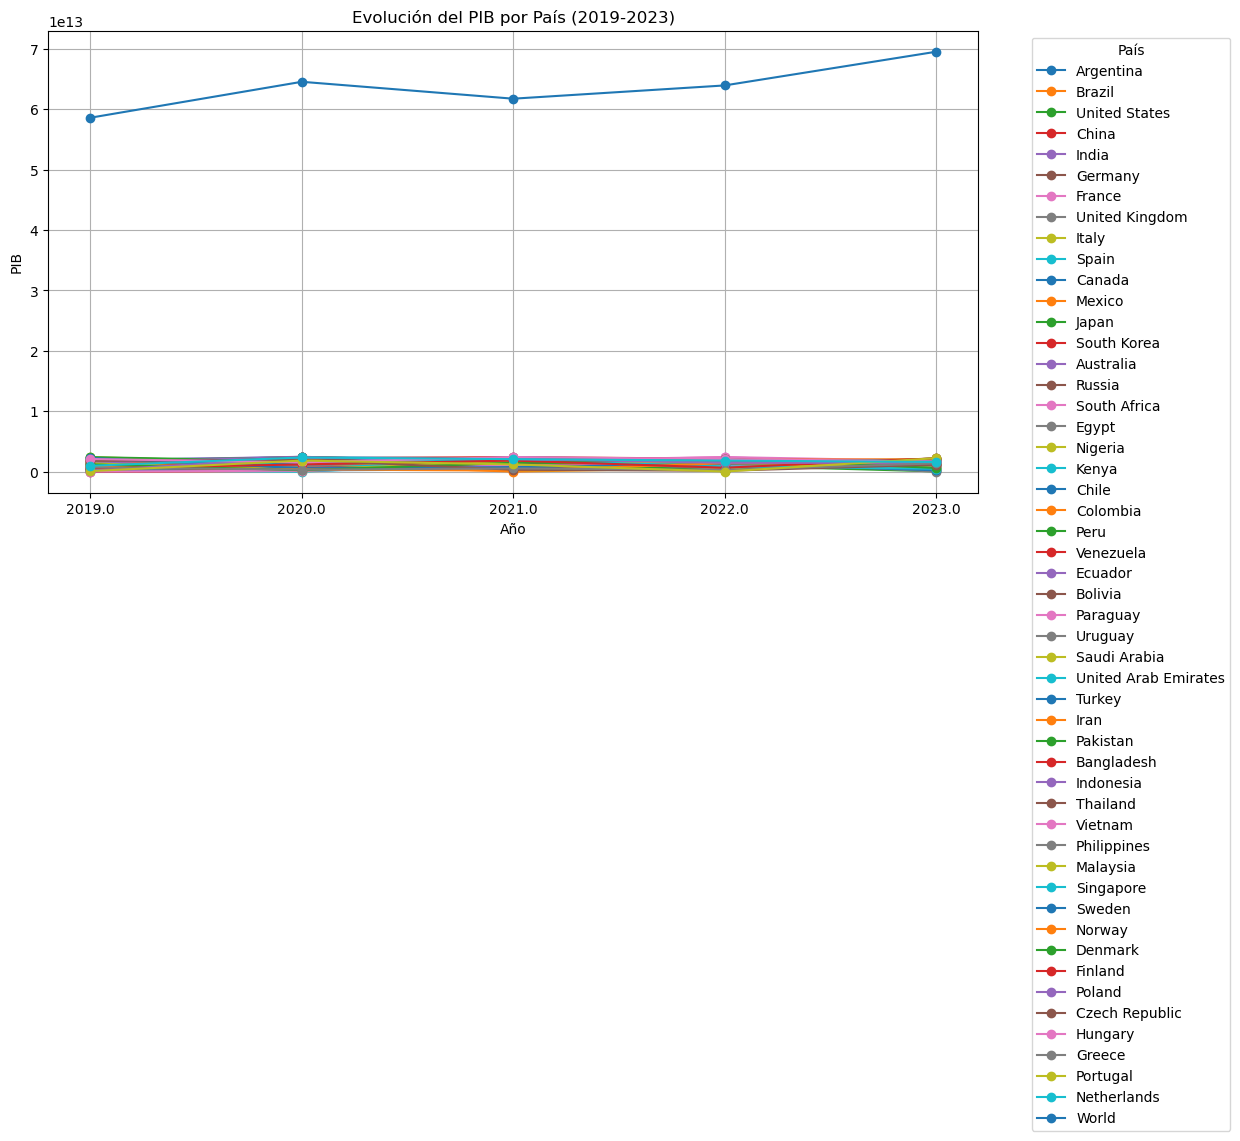

In [19]:
plt.figure(figsize=(12, 6))
for index, row in df.iterrows():
    plt.plot(df_pib.columns, row[df_pib.columns], marker='o', label=row['Country Name'])

plt.title('Evolución del PIB por País (2019-2023)')
plt.xlabel('Año')
plt.ylabel('PIB')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
print("\n")

Diagrama de disperción para la relación entre el PIB de países

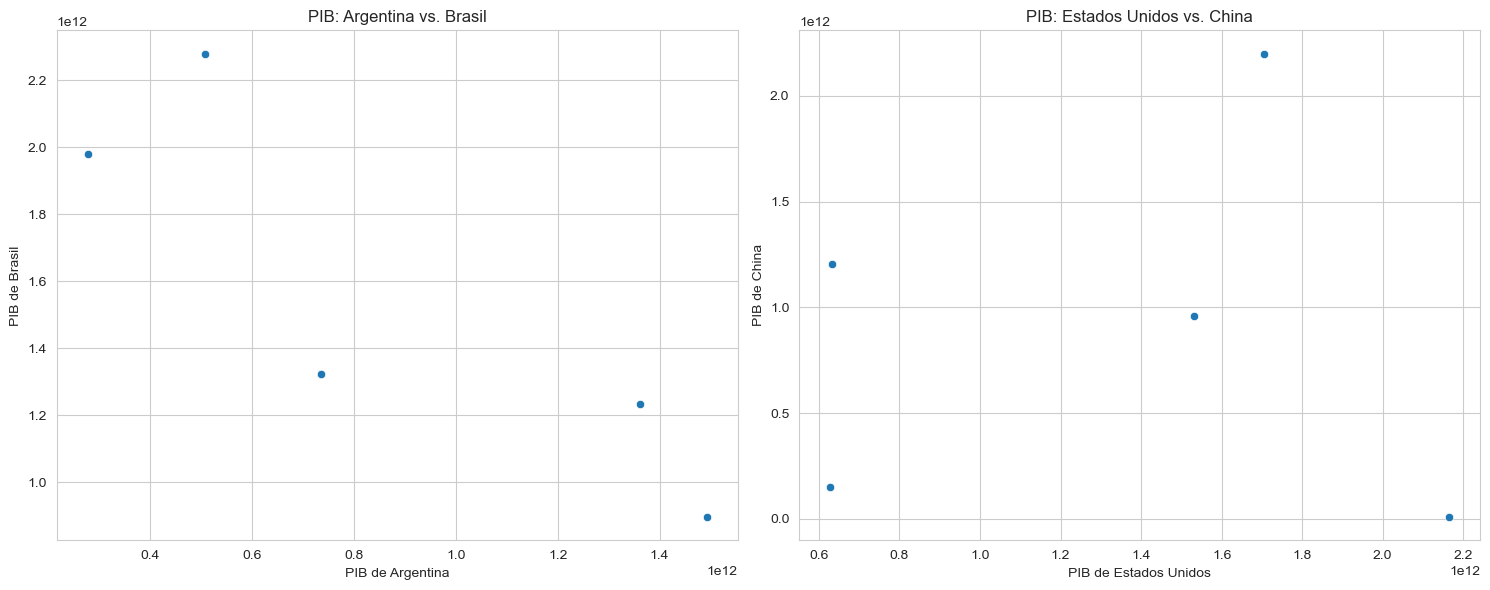

In [23]:
# Crea una figura y un conjunto de 2 subplots (1 fila, 2 columnas)
# El 'figsize' ajusta el tamaño total para que se vean bien
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Argentina vs. Brasil
sns.scatterplot(ax=axes[0],
                x=df.loc[df['Country Name'] == 'Argentina', '2019.0':'2023.0'].values.flatten(),
                y=df.loc[df['Country Name'] == 'Brazil', '2019.0':'2023.0'].values.flatten())
axes[0].set_title('PIB: Argentina vs. Brasil')
axes[0].set_xlabel('PIB de Argentina')
axes[0].set_ylabel('PIB de Brasil')
axes[0].grid(True)

# Gráfico 2: Estados Unidos vs. China
sns.scatterplot(ax=axes[1],
                x=df.loc[df['Country Name'] == 'United States', '2019.0':'2023.0'].values.flatten(),
                y=df.loc[df['Country Name'] == 'China', '2019.0':'2023.0'].values.flatten())
axes[1].set_title('PIB: Estados Unidos vs. China')
axes[1].set_xlabel('PIB de Estados Unidos')
axes[1].set_ylabel('PIB de China')
axes[1].grid(True)

# Ajusta el espacio entre subplots para que no se superpongan los títulos y etiquetas
plt.tight_layout()
# Muestra la figura con todos los gráficos
plt.show()

## MODELADO DE DATOS (REGRESION LINEAL)
Para estas visualizaciones usaremos la libreria scikit-learn para crear y entrenar un modelo de regresión lineal simple.

--- Análisis de Regresión Lineal: Argentina vs. Brazil ---
Coeficiente (Pendiente): -0.9296
Intersección: 2355762318616.7441
Coeficiente de Determinación (R²): 0.7527
--------------------------------------------------


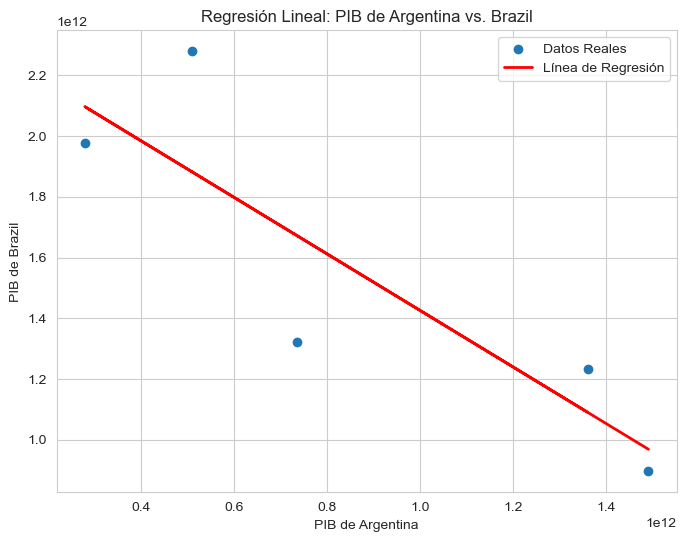

--- Análisis de Regresión Lineal: United States vs. China ---
Coeficiente (Pendiente): 0.0385
Intersección: 852892191326.2667
Coeficiente de Determinación (R²): 0.0009
--------------------------------------------------


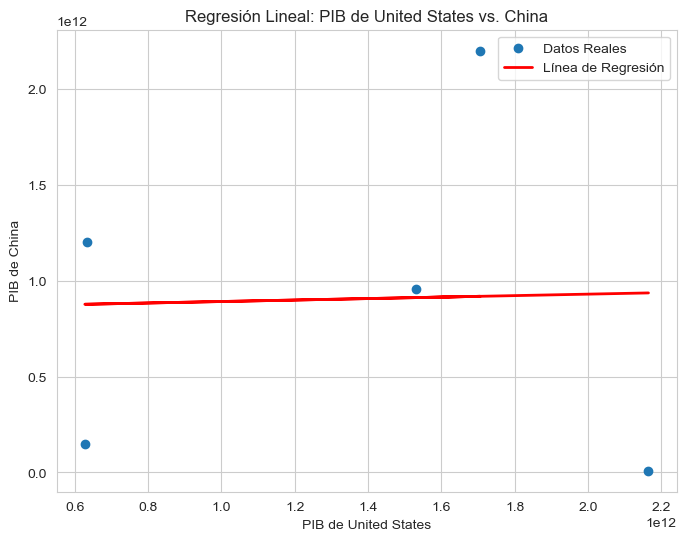

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Renombrar las columnas de los años para un manejo más fácil
df = df.rename(columns={'2019.0': 'PIB_2019', '2020.0': 'PIB_2020', '2021.0': 'PIB_2021', '2022.0': 'PIB_2022', '2023.0': 'PIB_2023'})

# Función para realizar el modelado y mostrar los resultados
def modelar_y_analizar(pais_x, pais_y, df_data):
    """
    Realiza un modelo de regresión lineal simple y muestra los resultados.
    pais_x: El país para el eje X (variable independiente).
    pais_y: El país para el eje Y (variable dependiente).
    df_data: El DataFrame con los datos.
    """
    # Extraer los datos para los países seleccionados
    pib_x = df_data.loc[df_data['Country Name'] == pais_x, 'PIB_2019':'PIB_2023'].values.flatten().reshape(-1, 1)
    pib_y = df_data.loc[df_data['Country Name'] == pais_y, 'PIB_2019':'PIB_2023'].values.flatten()
    
    # Verificar que los datos no estén vacíos
    if pib_x.size == 0 or pib_y.size == 0:
        print(f"Advertencia: No se encontraron datos para {pais_x} o {pais_y}.")
        return

    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(pib_x, pib_y)
    
    # Realizar predicciones y calcular métricas
    pib_y_pred = model.predict(pib_x)
    r2 = r2_score(pib_y, pib_y_pred)
    
    # Imprimir los resultados
    print(f"--- Análisis de Regresión Lineal: {pais_x} vs. {pais_y} ---")
    print(f"Coeficiente (Pendiente): {model.coef_[0]:.4f}")
    print(f"Intersección: {model.intercept_:.4f}")
    print(f"Coeficiente de Determinación (R²): {r2:.4f}")
    print("-" * 50)
    
    # Visualizar el modelo
    plt.figure(figsize=(8, 6))
    plt.scatter(pib_x, pib_y, label='Datos Reales')
    plt.plot(pib_x, pib_y_pred, color='red', linewidth=2, label='Línea de Regresión')
    plt.title(f'Regresión Lineal: PIB de {pais_x} vs. {pais_y}')
    plt.xlabel(f'PIB de {pais_x}')
    plt.ylabel(f'PIB de {pais_y}')
    plt.legend()
    plt.show()

# --- Ejecutar la función para los pares de países deseados ---

# Comparación 1: Argentina vs. Brasil
modelar_y_analizar('Argentina', 'Brazil', df)

# Comparación 2: Estados Unidos vs. China
# Asegúrate de usar los nombres exactos de tus países en el dataset
modelar_y_analizar('United States', 'China', df)


## INTERPRETACION DE LOS DATOS OBTENIDOS
### Para la comparación Argentina vs Brasil
* Coeficiente (Pendiente): -0.9296. Este valor negativo y cercano a -1 sugiere una relación lineal negativa entre el PIB de Argentina y el de Brasil. Si el PIB de Argentina aumenta, el de Brasil tiende a disminuir, y viceversa. Sin embargo, dado el contexto económico, esto podría ser un artefacto de los pocos puntos de datos disponibles (solo 5 años), y no necesariamente una relación causal.

* Coeficiente de Determinación (R²): 0.7527. Este valor indica que aproximadamente el 75.3% de la variabilidad en el PIB de Brasil puede ser explicada por la variabilidad en el PIB de Argentina. Un R² tan alto sugiere que el modelo de regresión lineal es un buen ajuste para los datos. A pesar de la relación negativa, la linealidad entre los datos es bastante fuerte.

### Para la comparación USA vs China
* Coeficiente (Pendiente): 0.0385. Este valor es muy cercano a cero, lo que sugiere una relación lineal muy débil o nula entre el PIB de Estados Unidos y el de China. Un ligero aumento en el PIB de EE. UU. no se traduce en un cambio significativo en el PIB de China, al menos en este modelo lineal.

* Coeficiente de Determinación (R²): 0.0009. Este valor es extremadamente bajo (cercano a cero). Indica que el PIB de EE. UU. explica menos del 0.1% de la variabilidad del PIB de China. En este caso, el modelo de regresión lineal no es un buen ajuste para los datos, y no hay evidencia de una relación lineal significativa entre el PIB de estos dos países basándose en la muestra de datos.